# Test de permutación y test de bootstrapping: Pruebas no paramétricas de contraste de hipótesis y establecimiento de intervalos de confianza 

Fuentes:
- [cienciadedatos.net](https://www.cienciadedatos.net/documentos/pystats04-bootstrapping-python.html)
- [DataCamp - Statistical Thinking in Pyhton (Part II)](https://learn.datacamp.com/courses/statistical-thinking-in-python-part-2)

https://towardsdatascience.com/bootstrapping-vs-permutation-testing-a30237795970

## Tabla de contenidos

1. [Introducción](#subparagraph2)
    1. [¿Qué son los test no paramétricos?](#subparagraph2)
2. [Resampling y bootstrapping como alternativa a los test no paramétricos](#subparagraph2)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Introducción

Cuando nos enfrentamos a un conjunto de datos, siempre debemos comenzar realizando un análisis exploratorio (EDA - Exploratory Data Analysis) de los mismos. En él, una de las preguntas que debemos responder es qué tipo de distribución siguen los datos. Esta pregunta no debe obviarse, ya que muchos test y pruebas estadísticas asumen la normalidad de los datos. En caso de que nos encontremos ante datos que no siguen una normalidad, debemos realizar pruebas no paramétricas.

Además ,como regla general, cuando la variable dependiente es categórica (nominal) u ordinal, se debe seleccionar un test no-paramétrico. Cuando la variable dependiente es continua, debemos mirar su distribución para elegir un test paramétrico o no paramétrico.

¿Qué ocurre entonces si nuestro conjunto de datos no sigue una distribución normal? Pues como se ha comentado, hay dos opciones:
- Utilizar un test no paramétrico
- Intentar la transformación del conjunto de datos a una distribuición normal. Una de las soluciones más usadas en este sentido es la transformación logarítmica.

La mayoría de test paramétricos tienen su homólogo no paramétrico, como se puede ver en la tabla a continuación. Cuando la distribución no es normal, se suele utilizar la mediana en vez de la media.

- <span style="background-color: #FFFF00">**Test estadísticos para comparar medias / medianas entre uno, dos o más grupos**</span>

![tests](https://www.biochemia-medica.com/assets/images/upload/Clanci/20/20-1/comparing_groups/bm-20-15.png?1535748515419)

- <span style="background-color: #FFFF00">**Test estadísticos para estudiar la relación entre variables**</span>

![tests](pics/non-para2.png)

### Bootstrapping como alternativa a los tets no paramétricos

El desarrollo de potentes ordenadores ha permitido alternativas a estos tests estadísticos en muchos casos y es donde entran en escena el **bootstrapping**.

Los métodos estadísticos basados en muestreo repetido (resampling) se engloban dentro de la estadística no paramétrica, ya que no requieren de ninguna asunción sobre la distribución de las poblaciones estudiadas. Son, por lo tanto, una alternativa a los test paramétricos (t-test, ANOVA,…) cuando no se satisfacen sus condiciones o cuando se quiere hacer inferencia sobre un parámetro distinto a la media. Uno de los métodos de resampling más utilizados es el **bootstrapping**.

Desde el punto de vista teórico, el escenario ideal para realizar inferencia sobre una población es disponer de infinitas (o una gran cantidad) de muestras de dicha población. Si para cada muestra se calcula el estadístico de interés, por ejemplo, la media, se obtiene lo que se conoce como distribución muestral. Esta distribución tiene dos características: su promedio tiende a converger con el valor real del parámetro poblacional, y su dispersión permite conocer el error esperado al estimar el estadístico con una muestra de un tamaño determinado.

En la práctica, no suele ser posible acceder a múltiples muestras. Si solo se dispone de una muestra, y esta es representativa de la población, cabe esperar que los valores en la muestra aparezcan aproximadamente con la misma frecuencia que en la población. El método de bootstrapping (Bradley Efron, 1979)) se basa en generar nuevas pseudo-muestras, del mismo tamaño que la muestra original, mediante muestreo repetido (sampling with replacement) de los datos disponibles.

Queda representado de la siguiente manera, como recoge Joaquín Amat Rodrigo:

![tests](pics/bootstrapping.png)

**La estrategia de bootstrapping se puede emplear para resolver varios problemas:**

- Calcular intervalos de confianza de un parámetro poblacional.

- Calcular la significancia estadística (p-value) de la diferencia entre poblaciones.

- Calcular intervalos de confianza para la diferencia entre poblaciones.

En cada uno, la hipótesis nula es distinta y, por lo tanto, la simulación de muestreo que tiene que realizarse. Esto significa que, aunque similares, el algoritmo debe adaptarse a cada caso de uso. En los siguientes apartados se muestran ejemplos de distintas aplicaciones.

### Los test de permutación o Permutation Test

Además de los test de Bootstrapping, se deben señalar los test de permutaciones. El test de permutaciones es un **test de significancia estadística para el estudio de diferencias entre grupos**. Fue desarrollado por Ronald Fisher y E.J.G. Pitman en 1930. La distribución del estadístico estudiado (media, mediana…) se obtiene calculando el valor de dicho estadístico para todas las posibles reorganizaciones de las observaciones en los distintos grupos. Dado que implica calcular todas las posibles situaciones, se trata de un test exacto.

Para ilustrar la idea de los test de permutación se plantea un experimento simple. Supóngase un conjunto de sujetos que se distribuye en dos grupos, A y B, de tamaños nA y nB, cuyas medias muestrales tras realizar el experimento resultan ser x¯A y x¯B. Se desea determinar si existe una diferencia significativa entre la media de los dos grupos, o lo que es lo mismo, comprobar si hay evidencias en contra de la hipótesis nula de que la diferencia observada es debida, únicamente, a la asignación aleatoria de los sujetos a los dos grupos y que ambas muestras proceden realmente de la misma población. 

Para solucionarlo se aplica un test de permutación:

- En primer lugar, se calcula la diferencia entre las medias de los dos grupos, lo que se conoce como **diferencia observada** 
- Todas las observaciones se combinan juntas sin tener en cuenta el grupo al que pertenecían.
- Se calculan todas las posibles permutaciones en las que las observaciones pueden ser distribuidas en dos grupos de tamaño nA y nB. Como esto en la práctica es imposible en muchos casos, se realizan miles de combinaciones aleatorias (Simulación de Monte Carlo). Eso implica que el resultado del p-valor no es exacto, sino aproximado.
- Para cada permutación, se calcula la diferencia entre medias. El conjunto de valores calculados forman la distribución exacta de las posibles diferencias siendo cierta la hipótesis nula. A esta distribución se le conoce como permutation distribution of the mean difference.
- El p-value de dos colas se calcula como la proporción de permutaciones en las que, el valor absoluto de la diferencia calculada, es mayor o igual al valor absoluto de la diferencia observada.

**Nota**: En este ejemplo se emplea como estadístico la media pero podría ser cualquier otro (mediana, varianza…)

**Assumptions de los Test de permutación**. La condición necesaria para un test de permutaciones se conoce como exchangeability, según la cual, todas las posibles permutaciones tienen la misma probabilidad de ocurrir siendo cierta la hipótesis nula. Las conclusiones de un test de permutación solo son aplicables a diseños de tipo experimental, en los que, tras haber elegido los sujetos del estudio, se realiza una asignación aleatoria a los diferentes grupos.

**Apunte final** Los test de permutación son test de significancia y por lo tanto se emplean para calcular p-values, no para intervalos de confianza.

## ¿Cuándo usar un test de permutación o un test bootstrap?

- La naturaleza de un test de permutación es diferente la de uno de bootstrap: **el test de Bootstrap analiza si dos muestras pueden hipotéticamente venir de la misma población**.
- Los test de permutación son test de significancia, se emplean para obtener p-values, no para intervalos de confianza.
- Los test de permutación generalmente se realizan cuando se sospecha que algo puede deberse al azar.
- Los test de bootstrapping se pueden utilizar para obtener p-values, pero se emplea cuando la aleatoriedad es debida al proceso de obtención de las muestras y no a la asignación en grupos.

Con todo ello los **test de permutación deben utilizarse para**:
- Los test de permutación deben utilizarse para analizar la presencia o ausencia de efectos y comprobar si los elementos vienen de una misma población (por ejemplo, un A/B testing para el desarrollo de una página web, donde se analiza si la diferencia en el número de clicks se debe al azar o no).
- Los test de permutación exigen tener muestras de ambos grupos. No se pueden utilizar si de una solo tienes la media o la mediana, como se verá a continuación.

**Los test de bootstrapping deben utilizarse para**:
- Cuantificar hipótesis de efectos conocidos.
- Comparar medias/medianas cuando de uno de los grupos solo se tiene la media/mediana y no el conjunto de datos.
- Determinar intervalos de confianza de manera no paramétrica.

### Ejemplo I. Test de permutación. Las ranas de Kleintheich y Gorb

Kleinteich y Gorb (Sci. Rep., 4, 5225, 2014) realizaron un experimento muy interesante en Sudamérica con ranas cornudas y midieron la fuerza de impacto de su lengua con las moscas que cazaban.

La rana A es una rana adulta y la rana B es una rana joven. Los investigadores midieron la fuerza de 20 impactos por cada rana. En el siguiente ejemplo se va evaluar si las ranas adultas y jóvenes tienen la misma distribución en la fuerza de impacto.

In [16]:
ID = list(['A','A', 'A', 'A', 'A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','A','B','B','B','B','B','B','B','B','B',
           'B','B','B','B','B','B','B','B','B','B','B'])

impact_force = list([1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515,
                     0.435,0.383,0.457,0.73,0.172,0.142,0.037,0.453,0.355,0.022,0.502,0.273,0.72,0.582,0.198,0.198,
                     0.597,0.516,0.815,0.402,0.605,0.711,0.614,0.468])

rana_df = {'ID': ID, 'impact_force':impact_force}
rana_df = pd.DataFrame(df)
rana_df.head()

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541


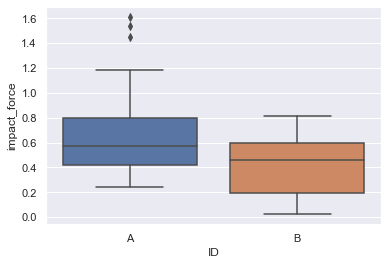

In [17]:
#Se realiza un análisis exploratorio de los datos
sns.set()

_ = sns.boxplot(x = 'ID', y = 'impact_force', data = rana_df)

Se puede ver la existencia de varios outliers en el grupo A.

In [24]:
def get_statistics(data):
    "Return mean, median, standard deviation and variance from a group of data"
    mean = np.mean(data)
    median = np.median(data)
    variance = np.var(data)
    sd = np.std(data)
    
    return mean, median, variance, sd

In [31]:
mean_a, median_a, variance_a, sd_a = get_statistics(rana_df[rana_df['ID'] == 'A']['impact_force'])
mean_b, median_b, variance_b, sd_b = get_statistics(rana_df[rana_df['ID'] == 'B']['impact_force'])
print(mean_a, median_a, variance_a, sd_a)
print(mean_b, median_b, variance_b, sd_b)

0.7073500000000001 0.573 0.17124932749999994 0.4138228213861579
0.4191 0.4605 0.05240319 0.22891743052900101


In [29]:
#Vamos a comprobar los outliers. Los outliers en un BoxPlot se encuentran a 1.5 sd
rana_df[rana_df['impact_force'] > (mean_a + 1.5 * sd_a)]

,ID,impact_force
0,A,1.612
5,A,1.539
8,A,1.453


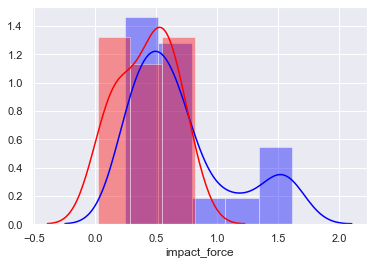

In [40]:
# Vamos a ver la distribución de los datos

a_frogs = rana_df[rana_df['ID'] == 'A']['impact_force']
b_frogs = rana_df[rana_df['ID'] == 'B']['impact_force']

_ = sns.distplot(a_frogs, color = 'blue')
_ = sns.distplot(b_frogs, color = 'red')

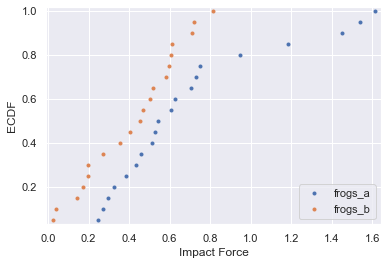

In [121]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

# Compute x,y values for ECDFs
x_control, y_control = ecdf(a_frogs)
x_treated, y_treated = ecdf(b_frogs)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('frogs_a', 'frogs_b'), loc='lower right')

# Label axes and show plot
plt.xlabel('Impact Force')
plt.ylabel('ECDF')
plt.show()

En el ECDF se puede intuir una mayor fuerza de impacto en las ranas A.

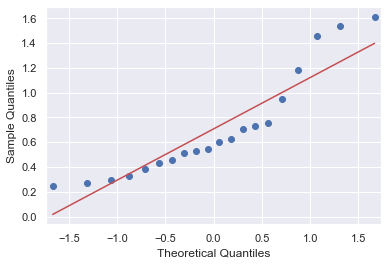

In [44]:
qqplot(a_frogs, line='s');

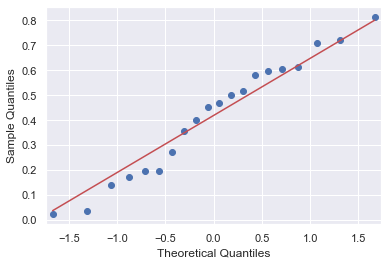

In [45]:
qqplot(b_frogs, line='s');

Mientras que el grupo B parece seguir una distribución normal, el grupo A parece no seguirla. Se puede ver claramente skewness positiva tnto en su distribución como en el Q-Q Plot.

Se va a comprobar normalidad con el test de Shapiro Wilk, más adecuado para N < 50, como es el caso.

In [47]:
from scipy.stats import shapiro

In [51]:
stats, p_value = shapiro(a_frogs)
print(p_value)

0.00685031758621335


In [52]:
stats, p_value = shapiro(b_frogs)
print(p_value)

0.4997333586215973


Efectivamente, el grupo A no sigue una distribución normal. No podríamos realizar pruebas paramétricas.

In [113]:
# Computamos la diferencia observada
dif_observada = mean_a - mean_b
print(dif_observada)

# Creamos un array que concatene ambas fuerzas de impacto sin distinguir el grupo
frogs = np.concatenate((a_frogs, b_frogs))
print(len(frogs))

# Creamos una función para realizar los replicados mediante permutación

def create_premutation_replicates (data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Creamos un array que va a contener el output
    perm_replicates = np.empty(size)
    
    #Concatenamos ambos conjuntos de datos
    data = np.concatenate((data_1, data_2))

    for i in range(size):
        
        #Realizamos una permutación
        permuted_data = np.random.permutation(data)    
        
        #Asignamos los elementos a cada permutation sample
        perm_sample_1 = permuted_data[:len(data_1)]
        perm_sample_2 = permuted_data[len(data_1):]
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Creamos 9999 réplicas de permutación, en las que se calculará la diferencia de medias entre grupos permutados
# devolviendo un array de dimension 9999. Se indica 9.999 para aplicar luego el +1 al calcular el p-valor, aplicando
# la corrección de continuidad sugerida por Davison and Hikley(1997)
perm_replicates = create_premutation_replicates(a_frogs, b_frogs, diff_of_means, size = 9999)

# Calculamos el p-value
# El p-value será la suma de replicates que superan o igualan la diferencia observada, partido entre los 10.000 replicates
p = np.sum(abs(perm_replicates) >= abs(dif_observada)) / (len(perm_replicates)+1)

# Print the result
print('p-value =', p)

0.2882500000000002
40
p-value = 0.0109


El p-valor nos dice que hay una probabilidad del 0.11% de que la dierencia de medias observadas sea la misma. Por lo tanto, se rechaza la hipótesis nula de que provengan de una misma población.

### Ejemplo II. Test de permutación. Los niños del colegio.

Similar a un A/B testing, se quiere comprobar si la participación en actividades extraescolares aumenta la capacidad empática de los estudiantes. Para ello, el colegio ofrece un programa voluntario en el que cada participante se designa de forma aleatoria a un grupo “control” que no recibe clases extraescolares o a un grupo “tratamiento” que sí las recibe. A final del año, todos los sujetos del estudio realizan un examen que determina su capacidad empática. En vista de los resultados ¿Se puede considerar que las clases extraescolares tienen un impacto en cómo se relacionan socialmente (en promedio) los estudiantes?

In [69]:
df_school = pd.read_csv('https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/AfterSchool.csv')
df_school.head()

,ID,Treatment,Aggress,Delinq,Victim
0,1,0,63.162641,44.463082,64.429964
1,2,0,51.827282,76.813612,64.429964
2,3,0,74.498000,50.933188,41.541056
3,4,0,40.491922,44.463082,41.541056
4,5,0,56.361425,44.463082,52.985510


Como siempre, se comienza con un análisis exploratorio de los datos.

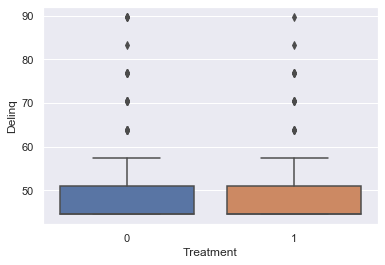

In [73]:
_ = sns.boxplot(x = 'Treatment', y = 'Delinq', orient='v', data = df_school)

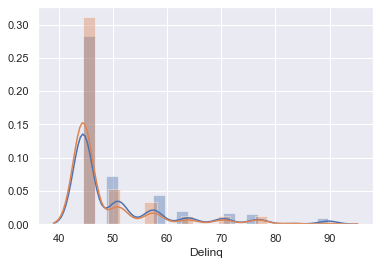

In [76]:
control_group = df_school[df_school['Treatment'] == 0]['Delinq']
treatment_group = df_school[df_school['Treatment'] == 1]['Delinq']

_ = sns.distplot(control_group)
_ = sns.distplot(treatment_group)

No se ve una clara diferencia entre los grupos. La distribución muestra un claro apuntalamiento en torno al valor 45 y una clara cola a la derecha (skewness = positiva).

La distribución no es normal

In [77]:
stats, p_value = shapiro(control_group)
print(p_value)

2.9871777005732007e-19


In [79]:
stats, p_value = shapiro(treatment_group)
print(p_value)

4.6470583529400015e-20


Dado que las observaciones no se distribuyen de forma normal, los test de hipótesis paramétricos no son adecuados. Como alternativa, se recurre a un test no paramétrico basado en resampling. Al tratarse de un diseño experimental en el que se ha partido de un conjunto de sujetos y se han asignado aleatoriamente a cada grupo, el test adecuado es el de permutaciones.

In [ ]:
# Computamos la diferencia observada
dif_observada = np.mean(control_group) - np.mean(treatment_group)
print(dif_observada)

Determinar si la diferencia observada es significativa equivale a preguntarse cómo de probable es obtener esta diferencia si el tratamiento no tiene efecto y los estudiantes se han asignado de forma aleatoria en cada grupo. Para poder obtener la probabilidad exacta, se necesita generar todas las posibles permutaciones en las que, 356 sujetos, pueden repartirse en dos grupos, y calcular la diferencia de medias para cada una. El número de permutaciones posibles es muy elevado, (3.93x10^105), por lo que se recurre a una simulación de Monte Carlo. Como en el caso anterior:

- Se reasignan aleatoriamente los sujetos a cada uno de los grupos manteniendo el tamaño original de cada uno.

- Se calcula la diferencia de sus medias y se almacena el valor. Existen múltiples formas de realizar las permutaciones, lo importante es que mimeticen una asignación aleatoria de los grupos manteniendo el tamaño original.

- Se repiten los pasos 1 y 2 n veces.

- Se calcula el p_value como la proporción de permutaciones en las que, la diferencia absoluta obtenida, es igual o mayor a la observada.

In [97]:
#Se cre un array con ambos grupos que servirá para hacer las permutaciones
sample = np.concatenate((control_group, treatment_group))
permuted_sample_1 = np.empty(len(control_group))
permuted_sample_2 = np.empty(len(treatment_group))

#Se crea un array vacío donde se almacenarán los resultados
perm_replicates = np.empty(9999)

#Se crea un bucle para realizar las permutaciones
for k in range(9999):
    permuted_data = np.random.permutation(sample)
    
    permuted_sample_1 = permuted_data[:len(control_group)]
    permuted_sample_2 = permuted_data[len(control_group):]
    
    perm_replicates[k] = np.mean(permuted_sample_1) - np.mean(permuted_sample_2)

p-value = 0.0529


Como era de esperar, si el tratamiento no es efectivo, la diferencia media entre grupos es muy próxima a cero (línea vertical roja en el gráfico de debajo).

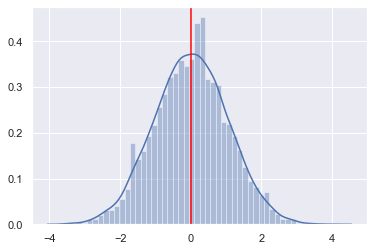

In [100]:
_ = sns.distplot(perm_replicates)
_ = plt.axvline(x = np.mean(perm_replicates), color = 'red')

In [101]:
# Calculamos el p-value
# El p-value será la suma de replicates que superan o igualan la diferencia observada, partido entre los 10.000 replicates
p = np.sum(abs(perm_replicates) > abs(dif_observada)) / (len(perm_replicates)+1) #El +1 es un término de corrección

# Print the result
print('p-value =', p)

p-value = 0.1036


### Conclusión

Los 356 sujetos del estudio fueron asignados de forma aleatoria a un grupo control (n=187) o a un grupo tratamiento (n=169) que asistió a clases extra escolares. Un test de permutación se empleó para determinar si existía una diferencia significativa en la capacidad empática promedio entre ambos grupos. El p-value fue calculado mediante una simulación de Monte Carlo con 9999 permutaciones usando la corrección de continuidad sugerida por Davison and Hikley(1997). El p-value obtenido muestra una evidencia muy débil en contra de la hipótesis nula de que el tratamiento no tiene efecto, sugiriendo que asistir a clases extra escolares no mejora la capacidad empática para los estudiantes que formaron parte del experimento. Siendo estadísticamente estrictos, no se puede extrapolar a la población de estudiantes ya que la selección de sujetos no fue aleatoria.


A modo de comprobación, siendo los tamaños muestrales de más de 30 observaciones, el test paramétrico t-test debería dar un resultado similar.



In [105]:
from scipy.stats import ttest_ind

ttest_ind(control_group, treatment_group)

Ttest_indResult(statistic=1.63790040929203, pvalue=0.10233098293705316)

### Boostrapping para contrastar hipótesis cuando no se tienen muestras de ambos grupos

Como se ha comentado antes, el bootstrapping es ligeramente diferente y se utiliza en diferentes situaciones. Una de ellas, es el contraste de hipótesis cuando no se tienen datos de ambos grupos.

Pongamos un ejemplo volviendo al caso de las ranas ya expuesto:

Se ha estudiado una nueva rana juvenil, llamada C, y se quiere saber si la rana B y C tienen fuerzas de impacto similares. Desafortunadamente no se tienen disponibles las muestras de la rana C, pero se sabe que su media es de 0.55 Newtowns. Como no se tienen esto datos, no se puedenn hacer permutaciones (**obviamente**) y por lo tanto, no se puede asegurar que las ranas B y C provienen de la misma ditribución.

<span style="background-color: #FFFF00">**La hipótesis que se plantea será diferente: la fuerza de impacto de la rana B es igual a la de la rana C.**</span>

Por lo tanto, nuestro objetivo será calcular la probabilidad de obtener una media de impacto diferente a la obtenida en la rana B.


Lo que se tendrá que hacer será:
- Trasladar las fuerzas de impacto de la rana B hasta que su media sea igual a la de la rana C, es decir, 0.55N.
- Tomar 9.999 muestras de bootrstrapping con la media de la fuerza trasladada.
- Computar el p-valor.

<span style="background-color: #FFFF00">**Notar que se debería hacer un EDA o Análisis exploratorio antes, pero para agilizar, se va a omitir**</span>

In [116]:
# Se traslada la fuerza de impacto de la rana B, restando los valores a la media y sumando la fuerza media de la rana B
translated_force_b = b_frogs - np.mean(b_frogs) + 0.55

#Se crea un array vacío con los bootstrap replicates
bs_replicates = np.empty(9999)
bs_sample = np.empty(len(translated_force_b))

for k in range(len(bs_replicates)):
    bs_sample = np.random.choice(translated_force_b, len(translated_force_b))
    bs_replicates[k] = np.mean(bs_sample)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(b_frogs)) / (len(bs_replicates)+1)

# Print the p-value
print('p = ', p)

p =  0.0049


### Bootstraping para contrastar hipótesis cuando se tienen muestras de ambos grupos

En un estudio reciente, Straub et al. (Proc. Roy. Soc. B, 2016) investigaron el efecto de los neonicotinoides en el esperma de las abejas polinizadoras. 

Queremos estudiar si en promedio, las abejas tratadas con neonicotinoides tienen el mismo número de espera por milímetro que las abejas no tratadas.

Como en este caso tenemos ambas muestras, debemos trasladarlas a la misma media.

In [118]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

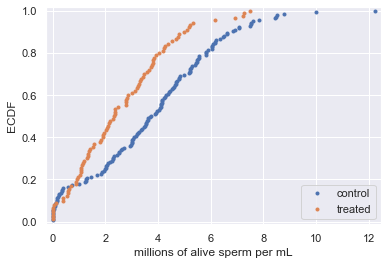

In [119]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

El ejercicio es similar al caso anterior, pero se van a crear unas funciones para facilitarlo:

In [123]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [128]:
# Compute the difference in mean sperm count: diff_means
diff_means = (np.mean(control) - np.mean(treated))

# Compute mean of pooled data: mean_count
mean_count = np.concatenate(control, treated)

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=9999)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=9999)

# Get replicates of difference of means: bs_replicates
bs_replicates = np.mean(bs_reps_control) - np.mean(treated_shifted)

# Compute and print p-value: p
p = np.sum(abs(bs_replicates) >= (np.mean(control) - np.mean(treated))) / (len(bs_replicates)+1)
print('p-value =', p)

TypeError: only integer scalar arrays can be converted to a scalar index

### Bootstrapping para la creación de intervalos de confianza

Las técnicas de bootstrapping también se pueden utilizar para elaborar intervalos de confianza.

Midiendo la diferencia en la profundidad de los picos de ciertas especies de pájaros en las galápagos, se descubrió que habían cambiado con el paso de los años. Se tiene una muestra de 1975 y una muestra de 2012.

A continuación se va a computar la diferencia en la media y se va a calcular un intervalo de confianza del 99% en la diferencia de la media.

In [130]:
bd_1975 = np.array([ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35])

bd_2012 = np.array([ 9.4 ,  8.9 ,  9.5 , 11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 ,
        9.6 ,  8.85,  8.8 ,  9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  ,
       10.2 ,  7.7 ,  9.  ,  9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 ,
        8.  , 10.  ,  8.95,  8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,
        9.5 ,  8.4 ,  9.3 ,  9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 ,
        8.9 ,  8.6 ,  8.8 ,  9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  ,
       10.2 ,  9.3 , 10.8 ,  8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 ,
        8.9 ,  9.4 ,  9.4 ,  8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 ,
        9.3 ,  9.  ,  9.2 ,  8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,
        8.6 , 10.6 ,  9.  ,  9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 ,
        8.  ,  9.5 ,  9.7 ,  9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 ,
        9.6 ,  9.4 , 10.  ,  8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 ,
        8.5 , 10.6 ,  9.3 ,  8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 ,
       10.  ,  9.  ,  8.7 ,  8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 ,
        9.1 ])

In [133]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data.
    It has the same lenght of original data, but select samples from the data with replacement.
    At the end, applies with the data the selected function"""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates.
    Uses bootstrap_replicate_1d_ to generate an array of N=size bootstrap_replicates_1d"""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.05935356 0.39088832] mm


Los datos muestran diferencia en las medias. ¿Es esto casual? 

Para comprobarlo, habría que hacer test de permutación.

In [136]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975)+ combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012)+ combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 9999)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 9999)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / (len(bs_diff_replicates)+1)

# Print p-value
print('p =', p)

p = 0.0033


El p-valor de 0.0033 sufiere que hay significancia estadística de que existe tal diferencia.